▶**TASK-2 : MOVIE RATING PREDICTION**

> Author: Sahil Ashok Mandewar

> Batch: Oct-Nov

> Domain: Data Science

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load Movie Dataset

In [8]:
movie_data = pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
movie_data.dropna(inplace=True)


In [9]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
movie_data.shape

(5659, 10)

In [12]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [14]:
movie_data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [13]:
movie_data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### Step 3:  Data Cleaning Process

In [16]:
movie_data = movie_data.drop(['Actor 2','Actor 3'], axis=1)
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [17]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [20]:
movie_data.isnull().sum()/len(movie_data)*100

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
dtype: float64

In [21]:
movie_data.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [24]:
movie_data['Year']= movie_data['Year'].str.replace(r'[()]','',regex=True)
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [25]:
movie_data['Duration']= movie_data['Duration'].str.replace(r'min','',regex=True)
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [26]:
movie_data['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [27]:
movie_data['Votes']= movie_data['Votes'].str.replace(r',','',regex=True)
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [28]:
movie_data['Genre'].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [29]:

movie_data['Genre']= movie_data['Genre'].fillna('Drama')
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [31]:
movie_data['Year']= movie_data['Year'].fillna(movie_data['Year'].mode()[0])
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [32]:
movie_data['Duration']= movie_data['Duration'].fillna(movie_data['Duration'].mode()[0])
movie_data['Rating']= movie_data['Rating'].fillna(movie_data['Rating'].mean())
movie_data['Votes']= movie_data['Votes'].fillna(movie_data['Votes'].mode()[0])
movie_data['Director']= movie_data['Director'].fillna(movie_data['Director'].mode()[0])
movie_data['Actor 1']= movie_data['Actor 1'].fillna(movie_data['Actor 1'].mode()[0])

In [33]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [34]:
movie_data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
dtype: object

In [35]:
movie_data['Duration']= movie_data['Duration'].astype(float)

In [36]:
movie_data['Year']= movie_data['Year'].astype(int)

In [37]:
movie_data['Votes']= movie_data['Votes'].str.replace(r'M','',regex=True)

In [38]:
movie_data['Votes']= movie_data['Votes'].str.replace(r'$','',regex=True)

In [39]:
movie_data['Votes']= movie_data['Votes'].astype(str).astype(float)

In [40]:
movie_data.dtypes

Name         object
Year          int64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
dtype: object

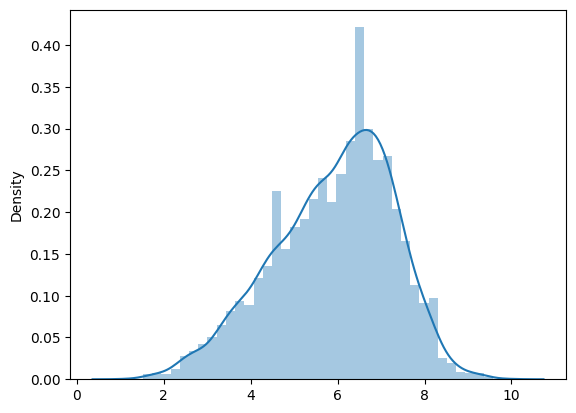

In [41]:
sns.distplot(x=movie_data['Rating'])
plt.show()

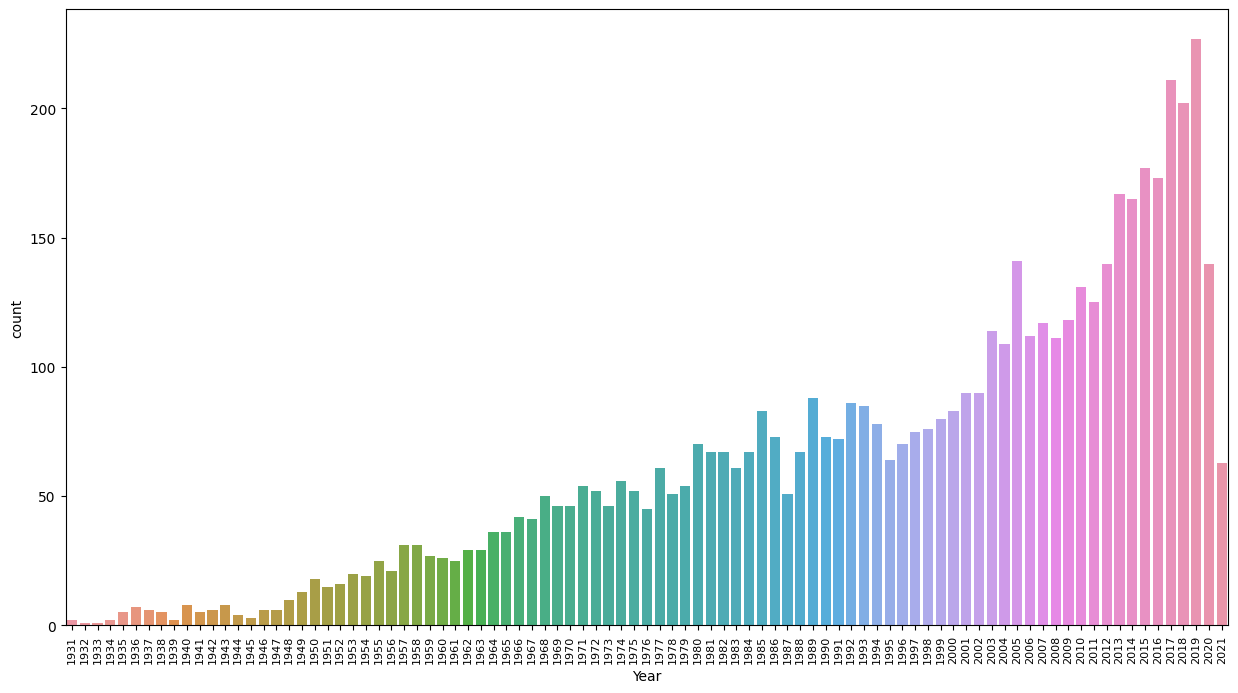

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x=movie_data['Year'])
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

<Axes: >

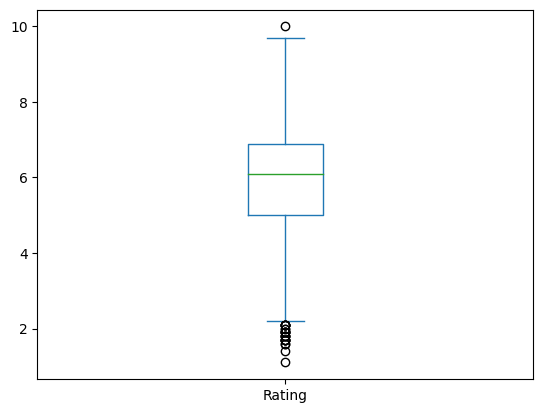

In [43]:
movie_data['Rating'].plot(kind='box')

In [44]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave


In [45]:
movie_data= movie_data.drop('Name',axis=1)
movie_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal
3,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik
5,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol
6,2005,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave


In [46]:
movie_data['Director'].unique()

array(['Gaurav Bakshi', 'Ovais Khan', 'Rahul Rawail', ..., 'Tariq Bhat',
       'Sumitra Bhave', 'Mozez Singh'], dtype=object)

In [47]:
movie_data['Actor 1'].unique()

array(['Rasika Dugal', 'Prateik', 'Bobby Deol', ..., 'Sadhana Singh',
       'Sunil Sukthankar', 'Darsheel Safary'], dtype=object)

<Axes: >

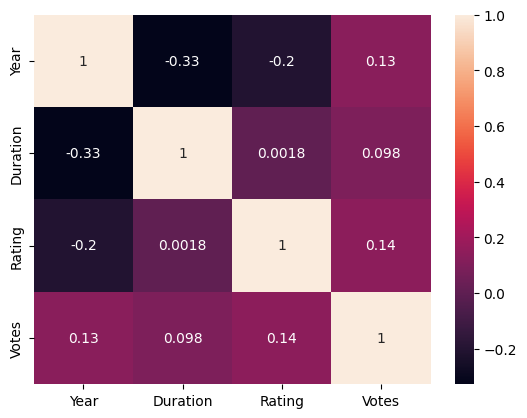

In [48]:
sns.heatmap(movie_data.corr(),annot=True)

### Appling Scaling and Encoding

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [52]:
movie_data[['Duration','Rating','Votes']]= mms.fit_transform(movie_data[['Duration','Rating','Votes']])
movie_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,0.293333,Drama,0.662921,0.000005,Gaurav Bakshi,Rasika Dugal
3,2019,0.296667,"Comedy, Romance",0.370787,0.000051,Ovais Khan,Prateik
5,1997,0.420000,"Comedy, Drama, Musical",0.404494,0.001390,Rahul Rawail,Bobby Deol
6,2005,0.403333,"Drama, Romance, War",0.707865,0.001828,Shoojit Sircar,Jimmy Sheirgill
8,2012,0.203333,"Horror, Mystery, Thriller",0.505618,0.000543,Allyson Patel,Yash Dave


In [54]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [55]:
movie_data['Director'] = lb.fit_transform(movie_data['Director'])

In [56]:
movie_data['Actor 1'] = lb.fit_transform(movie_data['Actor 1'])

In [57]:
movie_data['Genre'] = lb.fit_transform(movie_data['Genre'])
movie_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,0.293333,229,0.662921,0.000005,629,1352
3,2019,0.296667,184,0.370787,0.000051,1335,1198
5,1997,0.420000,157,0.404494,0.001390,1530,378
6,2005,0.403333,289,0.707865,0.001828,2044,692
8,2012,0.203333,320,0.505618,0.000543,135,1934


## Appling Machine Learning algorithm on Dataset

### Rating is target variable so we apply regression algorithm

In [58]:
x= movie_data.drop('Rating',axis=1)
y= movie_data['Rating']

#### split the dataset into train and test set

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
lb = LinearRegression()

In [63]:
lb.fit(x_train,y_train)

LinearRegression()

#### Perform prediction

In [65]:
y_predict = lb.predict(x_test)
y_predict

array([0.51622589, 0.53511552, 0.50921098, ..., 0.50812244, 0.64987362,
       0.56604351])

#### Evaluations

In [67]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_predict)
accuracy

0.09169967397679735

In [68]:
0.04339333837900183*100

4.339333837900183

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.12232654, 0.10843231, 0.03777574, 0.0859629 , 0.05654004])

- highest accuracy is 4.48%

In [70]:
### Try to apply another algoritm

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc

DecisionTreeRegressor()

In [72]:
dtc.fit(x_train,y_train)
dtc

DecisionTreeRegressor()

In [73]:
y_pred_dtc = lr.predict(x_test)
y_pred_dtc

array([0.51622589, 0.53511552, 0.50921098, ..., 0.50812244, 0.64987362,
       0.56604351])

In [74]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred_dtc)
accuracy

0.09169967397679735

- We goted same accuracy